## POO in python

<Axes: >

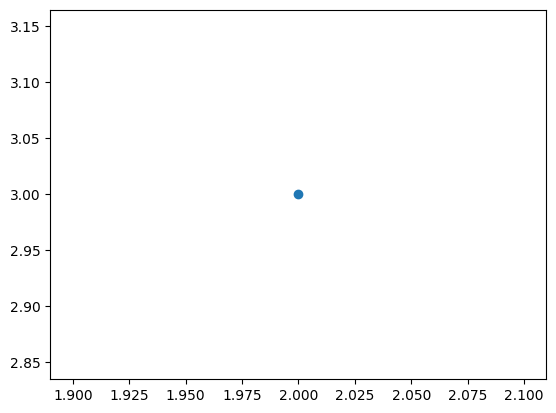

In [7]:
import numpy as np
import matplotlib.pyplot as plt
class Point():
    def __init__( self, x, y ):
        self.x = x
        self.y = y
    def distance( self, p ):
        return np.sqrt( (self.x - p.x) **2 + (self.y - p.y) **2 )
    def plot_point( self ):
        fig, ax = plt.subplots()
        ax.scatter(self.x, self.y)
        return ax
p = Point(2,3)
p.plot_point()

## COMPLEXITY IN PYTHON

In [4]:
l = [1]*100000000
def slow_sum(l):
    s = 0
    for x in l:
        s += x
    return s
    
%time sum(l)
%time slow_sum(l)
%timeit sum(l)
%timeit slow_sum(l)

CPU times: user 371 ms, sys: 173 μs, total: 371 ms
Wall time: 371 ms
CPU times: user 2.17 s, sys: 1.99 ms, total: 2.17 s
Wall time: 2.19 s
364 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.07 s ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
import numpy as np
def slow( n: int, m: int ):
    # compute the lazy sum of an numpy array of m random elements n times
    for i in range(n):
        arr = np.random.rand(m)
        s = 0
        for j in range (m):
            s += arr[j]
#%prun slow(1000, 10000)
%lprun -f slow slow(1000, 10000)
%timeit slow(1000, 10000)

1.02 s ± 9.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Timer unit: 1e-09 s

Total time: 2.93615 s
File: /tmp/ipykernel_5350/2783479568.py
Function: slow at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def slow( n: int, m: int ):
     3                                               # compute the lazy sum of an numpy array of m random elements n times
     4      1001     213699.0    213.5      0.0      for i in range(n):
     5      1000   85384686.0  85384.7      2.9          arr = np.random.rand(m)
     6      1000     176978.0    177.0      0.0          s = 0
     7  10001000 1058485893.0    105.8     36.1          for j in range (m):
     8  10000000 1791884077.0    179.2     61.0              s += arr[j]

In [2]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [8]:
def my_trimonaccy(n: int):
    #complexity: O( sqrt(n) ) < O( 2^logn ) < O(n)
    if n < 1:
        return 1
    return my_trimonaccy(n//2) + my_trimonaccy(n//4)

def my_fibonaccy(n: int):
    if n == 1 or n == 2 :
        return 1
    return my_fibonaccy( n-1 ) + my_fibonaccy( n-2 )
%timeit my_trimonaccy(100000)
%timeit my_fibonaccy(10)


348 μs ± 8.52 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.66 μs ± 44 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
import numpy as np
def f_iter1 (n: int):
    arr = np.zeros(n)
    arr[:2] = 1
    for i in range (2, n):
        arr[ i ] = arr[ i-1 ] + arr[ i-2 ]
    return arr[ n-1 ]
def f_iter2 (n: int):
    l = [1, 1]
    for i in range (2, n):
        l.append( l[ i-1 ] + l[ i-2 ])
    return l[ n-1 ]

#%timeit f_iter1(1000000) error overflow
#%timeit f_iter2(1000000) overflow ram
%lprun -f f_iter1 f_iter1(100)
#%lprun -f f_iter2 f_iter2(100)

Timer unit: 1e-09 s

Total time: 7.2354e-05 s
File: /tmp/ipykernel_3276/298256318.py
Function: f_iter1 at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def f_iter1 (n: int):
     3         1      10194.0  10194.0     14.1      arr = np.zeros(n)
     4         1      12582.0  12582.0     17.4      arr[:2] = 1
     5        99      11436.0    115.5     15.8      for i in range (2, n):
     6        98      37788.0    385.6     52.2          arr[ i ] = arr[ i-1 ] + arr[ i-2 ]
     7         1        354.0    354.0      0.5      return arr[ n-1 ]

In [3]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [6]:
%lprun -f f_iter2 f_iter2(100)

Timer unit: 1e-09 s

Total time: 2.635e-05 s
File: /tmp/ipykernel_3276/298256318.py
Function: f_iter2 at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                           def f_iter2 (n: int):
     9         1       1046.0   1046.0      4.0      l = [1, 1]
    10        99       9635.0     97.3     36.6      for i in range (2, n):
    11        98      15291.0    156.0     58.0          l.append( l[ i-1 ] + l[ i-2 ])
    12         1        378.0    378.0      1.4      return l[ n-1 ]

In [7]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [11]:
import numpy as np
np.spacing(1e10)

np.float64(1.9073486328125e-06)

In [59]:
import numpy as np
def my_bin_2_dec(b):
    dec = 0
    n = len(b)
    for i in range(n):
        dec += b[i] * (2** (n-i-1) )
    return dec
#my_bin_2_dec(np.array([1, 0, 0, 0]))

from collections import deque

def my_dec_2_bin(d: int):
    """
    Convierte entero decimal a binario
    """
    if d == 0:
        return [0]
    
    # Manejar números negativos
    if d < 0:
        d = -d  # Trabajar con valor absoluto
    
    b = deque()
    while d > 0:
        remainder = d % 2
        b.appendleft(remainder)
        d = d // 2
    return list(b)

my_dec_2_bin( my_bin_2_dec([1, 0 ,0, 0]) )
my_bin_2_dec( my_dec_2_bin( 12654) )

12654

In [52]:
from collections import deque

def my_bin_adder(b1: list, b2: list):
    b_sum = deque()
    carry = 0
    n1, n2 = len(b1), len(b2)
    n_max = max(n1, n2)
    i = 0
    
    while i < n_max or carry != 0:
        # Get i-th bit from each binary number
        bit_from_b1 = b1[i] if i < n1 else 0
        bit_from_b2 = b2[i] if i < n2 else 0
        
        # Compute sum and carry
        sum_dig = bit_from_b1 + bit_from_b2 + carry
        carry = sum_dig // 2
        sum_dig = sum_dig % 2
        
        # Add to result (using appendleft builds MSB first)
        b_sum.appendleft(sum_dig)
        i += 1
    
    return list(b_sum)

my_bin_adder ( [1,0,1,1], [1] )

[1, 1, 1, 0]

In [51]:
from collections import deque

def dot_float(d):
    """
    Normaliza un número decimal a la forma 0.d1d2... × 10^e
    donde d1 ≠ 0 (primer dígito después del punto decimal no es cero)
    """
    if d == 0:
        return 0.0, 0
    
    # Trabajar con valor absoluto
    d = abs(d)
    e = 0
    
    # Si d >= 1, dividir por 10 hasta que esté en [0.1, 1)
    while d >= 1:
        d /= 10
        e += 1
    
    # Si d < 0.1, multiplicar por 10 hasta que esté en [0.1, 1)
    while d < 0.1 and d != 0:
        d *= 10
        e -= 1
    
    return d, e

In [50]:
def my_frac_2_bin(m, lim_iter):
    """
    Convierte la parte fraccionaria decimal a binario
    0 <= m < 1
    """
    if m == 0:
        return [0] * lim_iter
    
    b = []
    for i in range(lim_iter):
        m *= 2
        bit_i = 1 if m >= 1 else 0
        b.append(bit_i)
        if m >= 1:
            m -= 1
        if m == 0:  # Si llegamos exactamente a 0, completar con ceros
            b.extend([0] * (lim_iter - i - 1))
            break
    return b

In [49]:
def decimal_to_binary_scientific(d):
    """
    Convierte decimal a notación científica binaria: ±1.mantisa × 2^exponente
    """
    if d == 0:
        return 0, [0], 0
    
    sign = 1 if d < 0 else 0
    d = abs(d)
    
    # Convertir a binario y normalizar
    if d >= 1:
        # Número >= 1: encontrar la posición del bit más significativo
        temp = d
        exp = 0
        while temp >= 2:
            temp /= 2
            exp += 1
        
        # Extraer mantisa (parte fraccionaria después del bit implícito)
        normalized = d / (2 ** exp)  # Ahora normalized está en [1, 2)
        mantisa_decimal = normalized - 1  # Quitar el 1 implícito
        
    else:
        # Número < 1: encontrar el primer bit 1
        temp = d
        exp = 0
        while temp < 1:
            temp *= 2
            exp -= 1
        
        mantisa_decimal = temp - 1  # Quitar el 1 implícito
    
    return sign, mantisa_decimal, exp
def my_dec_2_ieee(d: float):
    """
    Convierte un número decimal a representación IEEE 754 de 64 bits
    """
    # Casos especiales
    if d == 0:
        return [0], [0] * 11, [0] * 52
    
    # Extraer componentes
    sign_bit, mantisa_decimal, exponent = decimal_to_binary_scientific(d)
    
    # Bit de signo
    sign = [sign_bit]
    
    # Exponente con sesgo (1023 para double precision)
    biased_exponent = exponent + 1023
    
    # Verificar rango válido del exponente
    if biased_exponent <= 0:
        # Número subnormal o cero
        characteristic = [0] * 11
        # Para subnormales, ajustar mantisa
        mantisa = [0] * 52
    elif biased_exponent >= 2047:
        # Infinito o overflow
        characteristic = [1] * 11
        mantisa = [0] * 52
    else:
        # Número normal
        characteristic = my_dec_2_bin(biased_exponent)
        # Padding para asegurar 11 bits
        while len(characteristic) < 11:
            characteristic = [0] + characteristic
        
        # Mantisa (52 bits)
        mantisa = my_frac_2_bin(mantisa_decimal, 52)
    
    return sign, characteristic, mantisa

In [55]:
def ieee_to_decimal(sign, characteristic, mantisa):
    """
    Convierte de IEEE 754 de vuelta a decimal (para verificación)
    """
    # Convertir exponente de binario a decimal
    exp_decimal = my_bin_2_dec(characteristic)
    
    # Convertir mantisa de binario a decimal
    mantisa_decimal = my_bin_2_dec(mantisa)
    
    # Casos especiales
    if exp_decimal == 0:
        if mantisa_decimal == 0:
            result = 0.0  # Cero
        else:
            # Número subnormal
            result = mantisa_decimal * (2 ** -1022)
    elif exp_decimal == 2047:
        result = float('inf')  # Infinito
    else:
        # Número normal: (1 + mantisa) × 2^(exp - 1023)
        result = (1 + mantisa_decimal) * (2 ** (exp_decimal - 1023))
    
    return -result if sign[0] == 1 else result

In [60]:
# Función de prueba
def test_ieee_conversion():
    test_numbers = [0.0, 1.0, -1.0, 0.5, -0.5, 3.14159, -3.14159, 1234.5678]
    
    for num in test_numbers:
        print(f"\nNúmero original: {num}")
        sign, exp, mantisa = my_dec_2_ieee(num)
        print(f"Signo: {sign}")
        print(f"Exponente: {''.join(map(str, exp))}")
        print(f"Mantisa: {''.join(map(str, mantisa[:16]))}...") # Primeros 16 bits
        
        # Verificar conversión inversa
        recovered = ieee_to_decimal(sign, exp, mantisa)
        print(f"Número recuperado: {recovered}")
        print(f"Error: {abs(num - recovered) if num != 0 else abs(recovered)}")

if __name__ == "__main__":
    test_ieee_conversion()


Número original: 0.0
Signo: [0]
Exponente: 00000000000
Mantisa: 0000000000000000...
Número recuperado: 0.0
Error: 0.0

Número original: 1.0
Signo: [0]
Exponente: 01111111111
Mantisa: 0000000000000000...
Número recuperado: 1
Error: 0.0

Número original: -1.0
Signo: [1]
Exponente: 01111111111
Mantisa: 0000000000000000...
Número recuperado: -1
Error: 0.0

Número original: 0.5
Signo: [0]
Exponente: 01111111110
Mantisa: 0000000000000000...
Número recuperado: 0.5
Error: 0.0

Número original: -0.5
Signo: [1]
Exponente: 01111111110
Mantisa: 0000000000000000...
Número recuperado: -0.5
Error: 0.0

Número original: 3.14159
Signo: [0]
Exponente: 10000000000
Mantisa: 1001001000011111...
Número recuperado: 5141264298609886
Error: 5141264298609883.0

Número original: -3.14159
Signo: [1]
Exponente: 10000000000
Mantisa: 1001001000011111...
Número recuperado: -5141264298609886
Error: 5141264298609883.0

Número original: 1234.5678
Signo: [0]
Exponente: 10000001001
Mantisa: 0011010010100100...
Número rec